# News Classification

In [1]:
import nltk
import sklearn 

In [2]:
import pandas as pd

In [3]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91995\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

loading dataset

In [4]:
# dataset link =https://www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets
true=pd.read_csv("archive/News _dataset/True.csv",index_col=False)
fake=pd.read_csv("archive/News _dataset/Fake.csv",index_col=False)

In [5]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


no of subjects

In [7]:
true.subject.value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

In [8]:
fake.subject.value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

adding target to both the dataset

In [9]:
fake["target"]=0
true["target"]=1

In [10]:
dataset=pd.concat([true,fake],axis=0)
dataset.reset_index(drop=True,inplace=True)
dataset

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [11]:
data=dataset.drop(["subject","date","title"],axis=1)
data

,text,target
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...
44893,21st Century Wire says As 21WIRE reported earl...,0
44894,21st Century Wire says It s a familiar theme. ...,0
44895,Patrick Henningsen 21st Century WireRemember ...,0
44896,21st Century Wire says Al Jazeera America will...,0


In [12]:
from nltk import word_tokenize

In [13]:
data["text"]=data["text"].apply(word_tokenize)

In [14]:
data

,text,target
0,"[WASHINGTON, (, Reuters, ), -, The, head, of, ...",1
1,"[WASHINGTON, (, Reuters, ), -, Transgender, pe...",1
2,"[WASHINGTON, (, Reuters, ), -, The, special, c...",1
3,"[WASHINGTON, (, Reuters, ), -, Trump, campaign...",1
4,"[SEATTLE/WASHINGTON, (, Reuters, ), -, Preside...",1
...,...,...
44893,"[21st, Century, Wire, says, As, 21WIRE, report...",0
44894,"[21st, Century, Wire, says, It, s, a, familiar...",0
44895,"[Patrick, Henningsen, 21st, Century, WireRemem...",0
44896,"[21st, Century, Wire, says, Al, Jazeera, Ameri...",0


Stemming

In [15]:
from nltk.stem.snowball import SnowballStemmer
porter=SnowballStemmer("english")


In [16]:
def stem_it(text):
    return [porter.stem(i) for i in text]

In [17]:
data["text"]=data["text"].apply(stem_it)

In [18]:
data

,text,target
0,"[washington, (, reuter, ), -, the, head, of, a...",1
1,"[washington, (, reuter, ), -, transgend, peopl...",1
2,"[washington, (, reuter, ), -, the, special, co...",1
3,"[washington, (, reuter, ), -, trump, campaign,...",1
4,"[seattle/washington, (, reuter, ), -, presid, ...",1
...,...,...
44893,"[21st, centuri, wire, say, as, 21wire, report,...",0
44894,"[21st, centuri, wire, say, it, s, a, familiar,...",0
44895,"[patrick, henningsen, 21st, centuri, wireremem...",0
44896,"[21st, centuri, wire, say, al, jazeera, americ...",0


Stopword Removal

In [19]:
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91995\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
def stop_word_func(m):
    df=[w for w in m if not w.lower() in stop_words]
    return df

In [21]:
def stoping (k):
    df=[m for m in k if len(m)>2]
    return df

In [22]:
data["text"]=data["text"].apply(stoping)
data

,text,target
0,"[washington, reuter, the, head, conserv, repub...",1
1,"[washington, reuter, transgend, peopl, will, a...",1
2,"[washington, reuter, the, special, counsel, in...",1
3,"[washington, reuter, trump, campaign, advis, g...",1
4,"[seattle/washington, reuter, presid, donald, t...",1
...,...,...
44893,"[21st, centuri, wire, say, 21wire, report, ear...",0
44894,"[21st, centuri, wire, say, familiar, theme, wh...",0
44895,"[patrick, henningsen, 21st, centuri, wireremem...",0
44896,"[21st, centuri, wire, say, jazeera, america, w...",0


In [23]:
data["text"]=data["text"].apply(" ".join)

Splitting the data

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(data["text"], data["target"], test_size=0.2)

Vectorization

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer(max_df=0.7)
tfid_train=tfid.fit_transform(x_train)
tfid_test=tfid.transform(x_test)

In [26]:
print(tfid_train, tfid_test)

  (0, 79725)	0.033177909823519904
  (0, 68055)	0.03990548696967147
  (0, 72707)	0.024893238079802833
  (0, 30950)	0.01596747308822033
  (0, 66180)	0.024037000662587727
  (0, 67410)	0.02749542091207726
  (0, 9546)	0.021827802949298918
  (0, 63664)	0.03449155089574719
  (0, 11557)	0.03306323155648851
  (0, 69894)	0.03683850545241628
  (0, 31559)	0.020061564715283316
  (0, 21976)	0.023869374571819434
  (0, 66880)	0.022115129356663665
  (0, 32815)	0.022735267291465737
  (0, 74670)	0.012637278225089855
  (0, 70844)	0.07295830564873695
  (0, 23111)	0.015258447791320125
  (0, 21221)	0.03416062708671414
  (0, 33650)	0.04186523669189318
  (0, 79068)	0.06775502450525783
  (0, 59639)	0.02848148663136517
  (0, 42305)	0.03072390725229216
  (0, 42324)	0.044165978974498796
  (0, 70996)	0.03780944955800741
  (0, 8502)	0.02166059508066965
  :	:
  (35917, 67410)	0.03557132062938725
  (35917, 31559)	0.025954007145280376
  (35917, 74670)	0.01634907416274515
  (35917, 59678)	0.12797212206811656
  (35917, 6

Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
from sklearn.metrics import *
model_1=LogisticRegression(max_iter=10000)
model_1.fit(tfid_train,y_train)
pred_1=model_1.predict(tfid_test)
acc=accuracy_score(y_test,pred_1)
print("Accuracy score: ",acc*100)

Accuracy score:  98.89755011135858


Passive Aggressive Classifier

In [31]:
from sklearn.linear_model import PassiveAggressiveClassifier
model=PassiveAggressiveClassifier(max_iter=50)
model.fit(tfid_train, y_train)
y_pred = model.predict(tfid_test)
acc=accuracy_score(y_test,y_pred)
print(acc)

0.9964365256124722


Confusion Matrix

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
def confusion_matrix_plot(Y_test,Y_pred):
    cm=confusion_matrix(Y_test,Y_pred)
    sns.heatmap(cm,annot=True,fmt="g")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

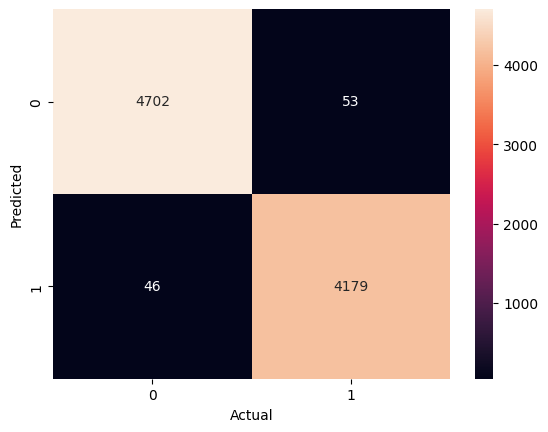

confusion_matrix Logistic Regression:  None


In [35]:
print ("confusion_matrix Logistic Regression: ",confusion_matrix_plot(y_test,pred_1))

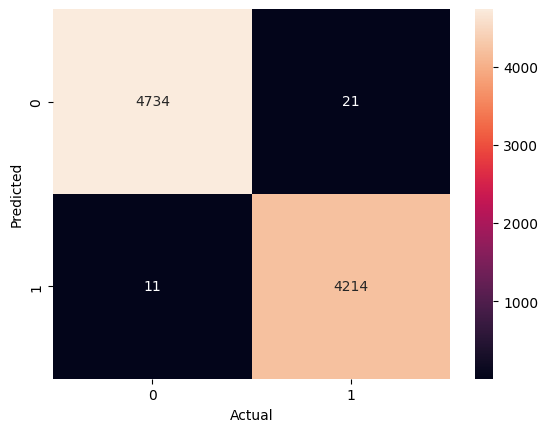

confusion_matrix Passive Aggressive Classifier:  None


In [36]:
print ("confusion_matrix Passive Aggressive Classifier: ",confusion_matrix_plot(y_test,y_pred))
